# Analysis of the Professional Counter Strike Global Offensive Circuit
### CMSC 320 Final Project
### Richard Chen
___

## Introduction and Motivation
____
![](https://seeklogo.com/images/C/csgo-logo-CAA0A4D48A-seeklogo.com.png)


Counter-Strike Global Offensive (CS:GO) is a competitive PC game developed by Valve Corporation in 2012. It is part of a franchise of games stretching back to the release of the first Counter-Strike in 2000. CS:GO is played in a first person perspective, in which two teams of 5 players compete to see who wins a total of 16 rounds the fastest. For the first 15 rounds of the game, one side will play an offensive side (T-side) that is tasked with planting and bomb and having it detonate. The other side is tasked with defusing the bomb or preventing it from being planted at all (CT-side). Both teams can also win the round by eliminating all enemy players. In case both teams draw at the 30th round on 15-15, 6 more rounds are added as overtime; ends if a team wins 4 out of 6 rounds. At any point, there are 7 active maps in the competitive pool. Overall matches are played in a **best of 3 maps** to see who wins the series overall.

Because of the competitive nature of the game, a professional circuit has thrived over the past 8 years. With record player numbers in the base game (1.1 million concurrent players), and increased investment from traditional North American sports franchises, such as the Dallas Cowboys, CS:GO might be a sneak preview into the **future of entertainment**. Having a predictive model of how a competitive CS:GO team can be successful could be worth **millions** as the industry becomes more mainstream. Success in this model could open more opportunities for the broader sport of esports. 

In this tutorial, I will be analyzing a dataset from Kaggle Datasets. I will be going step-by-step through the data pipeline of professional CS:GO teams to determine winning trends and strategies. My goal is to lay the framework and an example for others to build upon when analyzing a competitive multiplayer game. This tutorial and analysis will be written with Python 3 in mind.

## Dataset
___

The dataset used for this tutorial analysis was found via Kaggle Datasets and can be found [here.](https://www.kaggle.com/mateusdmachado/csgo-professional-matches) Once you download the files from the link, you should find 4 csv files that stores the data we're interested in. This dataset includes data about competitive CS:GO matches between November 2015 to March 2020. The original source where the data was originally scraped from was www.hltv.org.

 - Results.csv: stores data about map scores and team rankings
 - Picks.csv: stores data about team's map picks and vetos during the prematch selection between opposing teams
 - Economy.csv: stores data about round start equipment values for all rounds played
 - Players.csv: stores individual performances of professional players on each map

## Getting Started
___

First we'll need to import and import the following python libraries: 
 - [Pandas](https://pandas.pydata.org/)
 - [Beautiful Soup (OPTIONAL)](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
 - [Matplotlib](https://matplotlib.org/)
 - [Numpy](https://numpy.org/)
 - [Scikit-Learn](https://scikit-learn.org/stable/)
 - [Seaborn](https://seaborn.pydata.org/)

The syntax to install the libraries is "pip install < library name >"


In [1]:
# Importing the required libraries
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Data Scraping
___
Because the author of the CS:GO Kaggle dataset already scrapped the data off www.hltv.org, I will not be explicitly showing the steps needed to perform that. However, more information can be found by exploring documentation of **Beautiful Soup**, a Python library used to get data and parse a HTML page. [Link here to explore Beautiful Soup.](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)

## Data Tidying
____
After the data is scrapped, I use the **Pandas library's read_csv function** to load it into a a data structure called a "DataFrame." This will allow me to easily manipulate rows and columns based on their values. A DataFrame will be the basis of making our data usable for the rest of the pipeline. Essentially one row will represent one matchup between teams.

In [2]:
# loading data from our data into a dataframe
df = pd.read_csv("./csgo-professional-matches/results.csv")
# displaying the first few items of our dataframe
df.head()

,date,team_1,team_2,_map,result_1,result_2,map_winner,starting_ct,ct_1,t_2,t_1,ct_2,event_id,match_id,rank_1,rank_2,map_wins_1,map_wins_2,match_winner
0,2020-03-18,Recon 5,TeamOne,Dust2,0,16,2,2,0,1,0,15,5151,2340454,62,63,0,2,2
1,2020-03-18,Recon 5,TeamOne,Inferno,13,16,2,2,8,6,5,10,5151,2340454,62,63,0,2,2
2,2020-03-18,New England Whalers,Station7,Inferno,12,16,2,1,9,6,3,10,5243,2340461,140,118,12,16,2
3,2020-03-18,Rugratz,Bad News Bears,Inferno,7,16,2,2,0,8,7,8,5151,2340453,61,38,0,2,2
4,2020-03-18,Rugratz,Bad News Bears,Vertigo,8,16,2,2,4,5,4,11,5151,2340453,61,38,0,2,2


At this point, we will use functions within the Pandas library to make our DataFrame more usable. One of which is to eliminate excessive data that we will not use in our analysis moving forward. For example in this CS:GO case, we will eliminate matches that did not feature top 10 teams. We will also have to limit to years of 2018 because of our dataset size is too large still. We will also drop columns that will not be helpful moving forward.

### Functions used here:
 - **df = df.drop('column_name',1)** 
     - will be used to delete 'column_name' in a Pandas DataFrame. 1 is the axis number (0 for rows and 1 for columns).
 - **df = df.loc[df['column_name']...]** 
     - this will be used to filter the DataFrame based on the value of column_name. Could use any boolean statement of comparison in the "..." part 
 - **df['column_name'] = df.apply(lambda row: .... if ... else ...,axis =1)** 
     - this is the syntax used to create a new column based on already existing values of a particular row
 - **df.rename(index = str, columns = {"old_column_name": "new_column_name", ....}, inplace = True)** 
     - this can be used to rename columns and make it more presentable for the data pipeline further down
 - **df['date'] = pd.to_datetime(df['date'])** 
     - can be used to convert a column into a datetime object
 - **new_df = new_df.sort_values(by = 'col_name', ascending = False)**
     - will be used to sort rows by the value of a column
 - **df = df_reset_index(drop = True)** 
     - can be used to reset the index numbering of values

In [3]:
# cleaning up data
df = df.drop('starting_ct',1)
df = df.drop('result_1',1)
df = df.drop('result_2',1)
df = df.drop('map_wins_1',1)
df = df.drop('map_wins_2',1)
df = df.drop('event_id',1)
df = df.loc[df['rank_1'] <= 10]
df = df.loc[df['rank_2'] <= 10]

df['MapWinner'] = df.apply(lambda row: row.team_2 if row.map_winner == 2 else row.team_1, axis = 1)
df['SeriesWinner'] = df.apply(lambda row: row.team_2 if row.match_winner == 2 else row.team_1, axis = 1)
df['date'] = pd.to_datetime(df['date'])
df['Year'] = df.apply(lambda row: row.date.year, axis = 1)
df = df.loc[df['Year'] == 2018]
df = df.drop('date',1)

df = df.drop('map_winner',1)
df = df.drop('match_winner',1)
df.rename(columns = {'_map':'Map','team_1':'Team_One','team_2':'Team_Two','rank_1':'Team_Ones_Rank','rank_2': 'Team_Twos_Rank', \
                    'ct_1': 'Team_One_CT_Rounds','t_2': 'Team_Two_T_Rounds', 't_1':'Team_One_T_Rounds', 'ct_2':'Team_Two_CT_Rounds'}, inplace = True)
df = df.sort_values(by = 'match_id', ascending = False)
df = df.reset_index(drop = True)
df.head()

,Team_One,Team_Two,Map,Team_One_CT_Rounds,Team_Two_T_Rounds,Team_One_T_Rounds,Team_Two_CT_Rounds,match_id,Team_Ones_Rank,Team_Twos_Rank,MapWinner,SeriesWinner,Year
0,Astralis,Natus Vincere,Dust2,12,3,4,1,2329728,1,3,Astralis,Astralis,2018
1,Astralis,Natus Vincere,Overpass,4,11,3,5,2329728,1,3,Natus Vincere,Astralis,2018
2,Astralis,Natus Vincere,Cache,10,5,6,4,2329728,1,3,Astralis,Astralis,2018
3,MIBR,Natus Vincere,Mirage,3,0,13,2,2329723,4,3,MIBR,MIBR,2018
4,FaZe,NiP,Inferno,10,5,5,10,2329722,5,7,NiP,NiP,2018


## Entity Resolution
___
Potential issue that might arise when using multiple datasets; for example, if the data scientist wanted to use data from Players.csv. I will now show an example of **joining** two DataFrames together. If the question was: "I want to see how this individual player performs when his team wins vs how this player performs when his team loses" In order to analyze such a question, you would join the data on match_id. I have performed this below as well as cleanup the player dataset. I have consolidated and averaged data from a player's matchups for each map.

Functions used here:
 - **df = df[['...']]**
     - will be used to specify the columns we want to keep from the original dataframe
 - **df['...'] = df[['...']].mean(axis=1)**
     - will be used to create a new column from data kept in other columns. In this case, it's averaging data from the other columns
 - **df = df.dropna(subset=[...])**
     - will be used to drop rows that have a NaN value in the subset columns.

In [4]:
# cleaning up the player data
player_df = pd.read_csv("./csgo-professional-matches/players.csv")
player_df = player_df[['player_name','team', 'match_id', 'm1_rating_ct', 'm1_rating_t', 'm2_rating_ct', \
                       'm2_rating_t','m3_rating_ct', 'm3_rating_t']]
player_df = player_df.dropna(subset=['m1_rating_ct', 'm1_rating_t', 'm2_rating_ct','m2_rating_t'])
player_df['Average_T_Rating'] = player_df[['m1_rating_t', 'm2_rating_t', 'm3_rating_t']].mean(axis=1)
player_df['Average_CT_Rating'] = player_df[['m1_rating_ct', 'm2_rating_ct', 'm3_rating_ct']].mean(axis=1)
player_df = player_df.drop(['m1_rating_ct','m1_rating_t', 'm2_rating_ct','m2_rating_t','m3_rating_ct',\
                            'm3_rating_t'],1)
player_df.rename(columns = {'player_name': 'Player', 'team': 'Team'}, inplace = True)
player_df.head()

,Player,Team,match_id,Average_T_Rating,Average_CT_Rating
0,Brehze,Evil Geniuses,2339385,0.860000,1.080000
1,CeRq,Evil Geniuses,2339385,0.676667,1.150000
2,EliGE,Liquid,2339385,0.876667,1.486667
3,Ethan,Evil Geniuses,2339385,0.413333,1.096667
4,NAF,Liquid,2339385,0.876667,1.273333


My dataframe here has been transformed so now each row reflects a player's performance during a specific match. I want to now merge my two dataframes together. I will also be dropping some specific teams that did not perform especially well during the year based on information and crosschecked from the original source "hltv.org."

Functions used here:
 - **new_df = pd.merge(temp_df,df,on = 'col_name')**
     - will be used to join dataframes together,in this setup, you'll be joining temp_df and df on the column name. By default this is a inner join, so only data that has a perfect match on this identification column will be kept in the final dataframe.

In [5]:
# creating a new dataframe by merging
new_df = pd.merge(player_df,df,on = 'match_id')
new_df = new_df.sort_values(by = 'match_id', ascending = False)
new_df = new_df.reset_index(drop = True)
new_df = new_df.drop('match_id',1)
new_df = new_df.drop('Year',1)
new_df = new_df.loc[new_df['Team'] != 'Renegades']
new_df = new_df.loc[new_df['Team'] != 'North']
new_df = new_df.loc[new_df['Team'] != 'NiP']
new_df = new_df.loc[new_df['Team'] != 'Gambit']
new_df = new_df.loc[new_df['Team'] != 'BIG']
new_df = new_df.loc[new_df['Team'] != 'NRG']
new_df = new_df.loc[new_df['Team'] != 'SK']
new_df = new_df.loc[new_df['Team'] != 'G2']
new_df.head()

,Player,Team,Average_T_Rating,Average_CT_Rating,Team_One,Team_Two,Map,Team_One_CT_Rounds,Team_Two_T_Rounds,Team_One_T_Rounds,Team_Two_CT_Rounds,Team_Ones_Rank,Team_Twos_Rank,MapWinner,SeriesWinner
0,Edward,Natus Vincere,0.833333,0.91,Astralis,Natus Vincere,Dust2,12,3,4,1,1,3,Astralis,Astralis
1,dupreeh,Astralis,1.306667,1.43,Astralis,Natus Vincere,Overpass,4,11,3,5,1,3,Natus Vincere,Astralis
2,Edward,Natus Vincere,0.833333,0.91,Astralis,Natus Vincere,Overpass,4,11,3,5,1,3,Natus Vincere,Astralis
3,s1mple,Natus Vincere,1.270000,0.90,Astralis,Natus Vincere,Cache,10,5,6,4,1,3,Astralis,Astralis
4,s1mple,Natus Vincere,1.270000,0.90,Astralis,Natus Vincere,Overpass,4,11,3,5,1,3,Natus Vincere,Astralis


## Exploratory Data Analysis: Visualization
___

At this point, we have tidied the data, so it's easy to work with, and now will move onto the step of Exploratory Data Analysis. We'll show bar charts of how the performance of the teams in which they won a map and how that performance was determined by either their T side rating or their CT side rating. We will focus on a small subset of the teams that performed the best over the year.

Functions used here:
 - **fig, (ax1, ax2) = plt.subplots(1,2,sharex = True, figsize = (15,10))**
     - this function here is used to show multiple subplots on a single figure
 - **ax1.bar(x = df['...'],height = df['...'], color = 'blue')**
     - this function actually draws the bar chart with a specific color
 - **ax1.title.set_text('...')**
     - this function here sets the title of the bar chart
 - **plt.figure(figsize=(15,10,))** 
     - this will designate a specific size for a figure
 - **sns.set_style("whitegrid")**
     - this will also designate a white grid background to the figure
 - **temp_plt = sns.scatterplot(x='...', y='...', hue='...', data=new_df,s = 500)**
     - this will actually generate the scatterplot with the specified x-axis,y-axis,dataframe, and the size of the circles

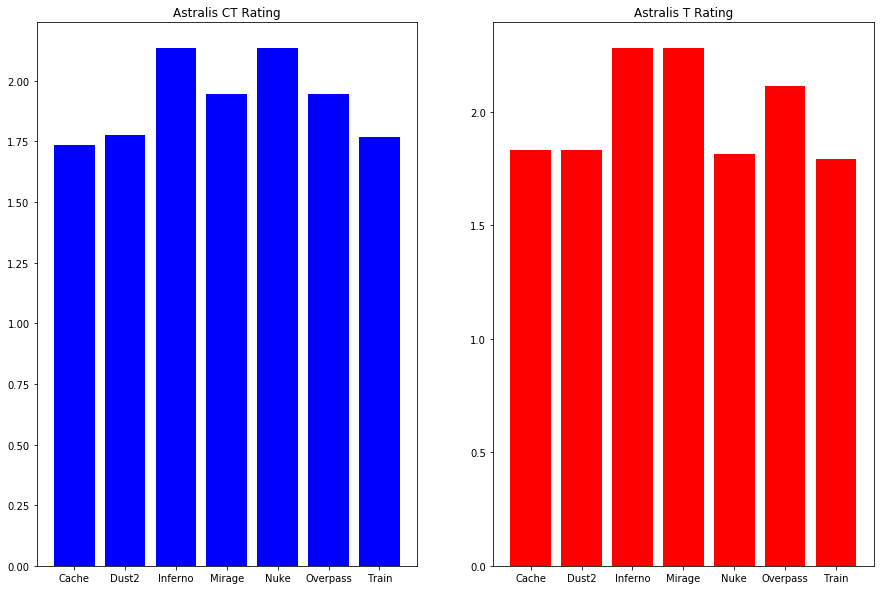

In [6]:
astralis_df = new_df.loc[new_df['Team'] == 'Astralis']
astralis_df = astralis_df.loc[astralis_df['MapWinner'] == 'Astralis']
astralis_df.reset_index(drop = True)
fig, (ax1, ax2) = plt.subplots(1,2,sharex = True, figsize = (15,10))
ax1.bar(x = astralis_df['Map'],height = astralis_df['Average_CT_Rating'], color = 'blue')
ax2.bar(x = astralis_df['Map'],height = astralis_df['Average_T_Rating'], color = 'red')

ax1.title.set_text('Astralis CT Rating')
ax2.title.set_text('Astralis T Rating')

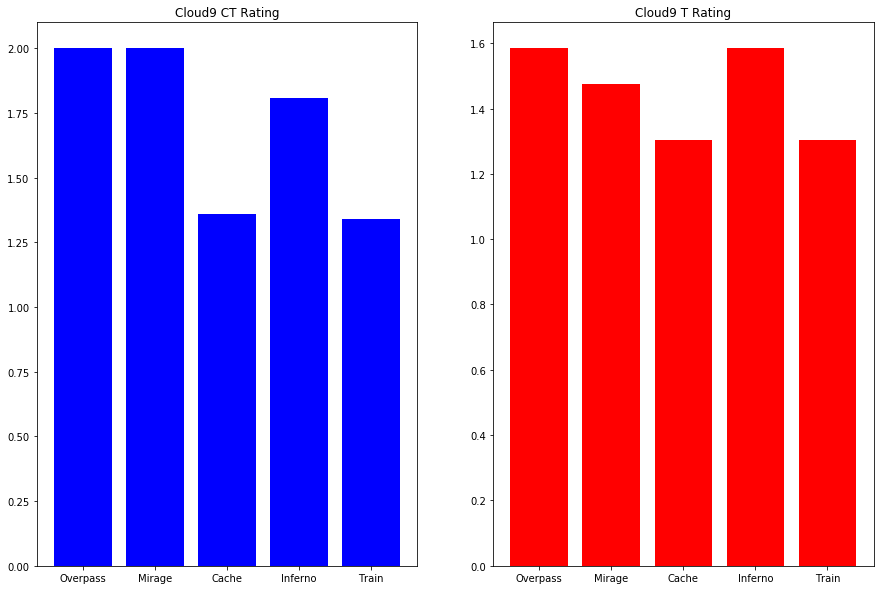

In [7]:
cloud9_df = new_df.loc[new_df['Team'] == 'Cloud9']
cloud9_df = cloud9_df.loc[cloud9_df['MapWinner'] == 'Cloud9']
cloud9_df.reset_index(drop = True)
fig, (ax1, ax2) = plt.subplots(1,2,sharex = True, figsize = (15,10))
ax1.bar(x = cloud9_df['Map'],height = cloud9_df['Average_CT_Rating'], color = 'blue')
ax2.bar(x = cloud9_df['Map'],height = cloud9_df['Average_T_Rating'], color = 'red')
ax1.title.set_text('Cloud9 CT Rating')
ax2.title.set_text('Cloud9 T Rating')

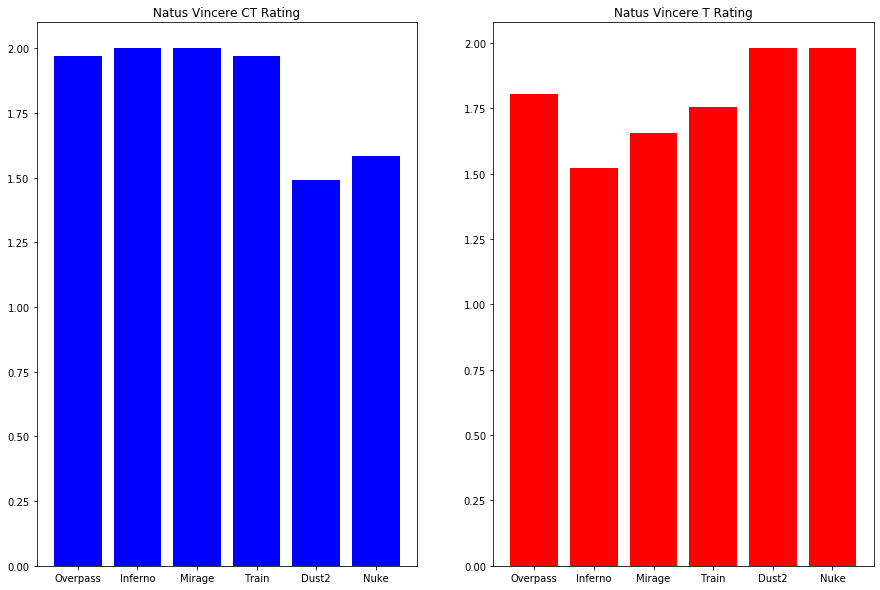

In [8]:
navi_df = new_df.loc[new_df['Team'] == 'Natus Vincere']
navi_df = navi_df.loc[navi_df['MapWinner'] == 'Natus Vincere']
navi_df.reset_index(drop = True)
fig, (ax1, ax2) = plt.subplots(1,2,sharex = True, figsize = (15,10))
ax1.bar(x = navi_df['Map'],height = navi_df['Average_CT_Rating'], color = 'blue')
ax2.bar(x = navi_df['Map'],height = navi_df['Average_T_Rating'], color = 'red')

ax1.title.set_text('Natus Vincere CT Rating')
ax2.title.set_text('Natus Vincere T Rating')

## Exploratory Data Analysis: Summary Statistics
___

In our bar charts, we are also exploring the concept of summary statistics. For each map that a specific team has won, we are analysis the central trend of mean. We see that a team like Natus Vincere has a much lower average CT rating across its players when playing Dust2. However, its T side rating is still quite high, this means their players are more suited to an offensive minded gameset. In the Cloud9 plot, we see that the omission of certain maps means they simply did not play and win those maps. For example, the map "Nuke" is ommitted from x-axis; that means the groupby function did not catch it. For the following plot, we see a head-head between our top teams and see what teams have lost what other teams and what map they're on. Based on the scatter plot, we see that Astralis has not lost a single map to Cloud9 in 2018. 


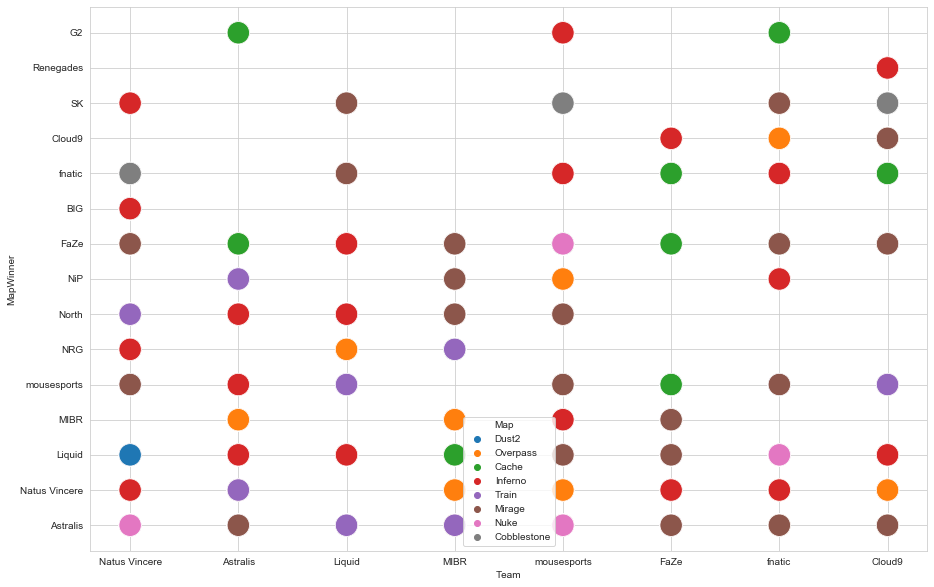

In [9]:
plt.figure(figsize=(15,10,))
sns.set_style("whitegrid")
temp_plt = sns.scatterplot(x='Team', y='MapWinner', hue='Map', data=new_df,s = 500)

## Predictive Models
___

In this final section, I will be focus on creating linear regression models to predict the future trajectory of a team. A team with a high CT-side rating and high T-side rating is the goal for all teams in this dataset. We will color by the color of a player to see which players are underperforming and based on what side they are on. Scikit is used to create the linear regression models and then use existing data to create linear equations to model performance.

From the lines draw we can conclude the performance of a team given the current performance of the players. This should help predict a team's trajectory to see if they should make roster changes or not. You can see if a player is performing as well as their fellow teammates.

Functions used here:
 - **sub_X = [[x] for x in new_df['...'].values]**
     - this function form here is used to get a subset of the data 
 - **x_train, x_test, y_train, y_test = train_test_split(sub_X, sub_Xvals, test_size=0.33, random_state=23)**
     - this function is used to split our data into a training set vs a test set
 - **sub_lm= LinearRegression().fit(x_train, y_train)**
     - this function will create the model based on the training data
 - **prediction = sub_lm.predict(x_test)**
     - this function will make the prediction on our test data

Our coefficient for Astralis is [[0.01554894]]
Mean squared error: 0.07


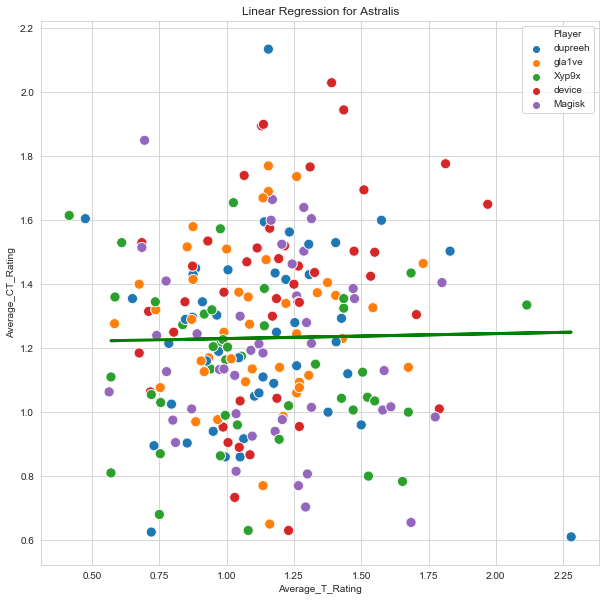

Our coefficient for Cloud9 is [[0.13429329]]
Mean squared error: 0.09


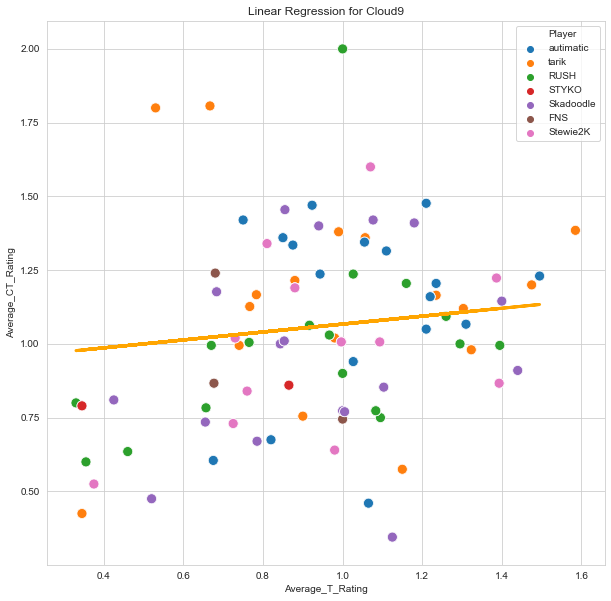

Our coefficient for FaZe is [[0.23803813]]
Mean squared error: 0.11


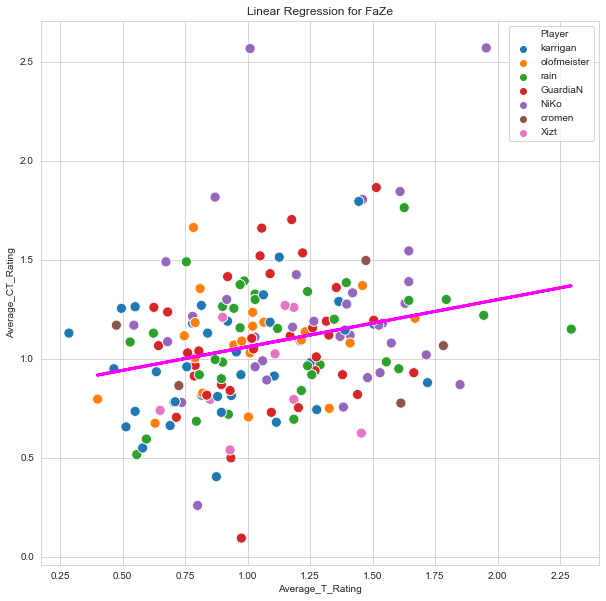

Our coefficient for Liquid is [[0.268729]]
Mean squared error: 0.07


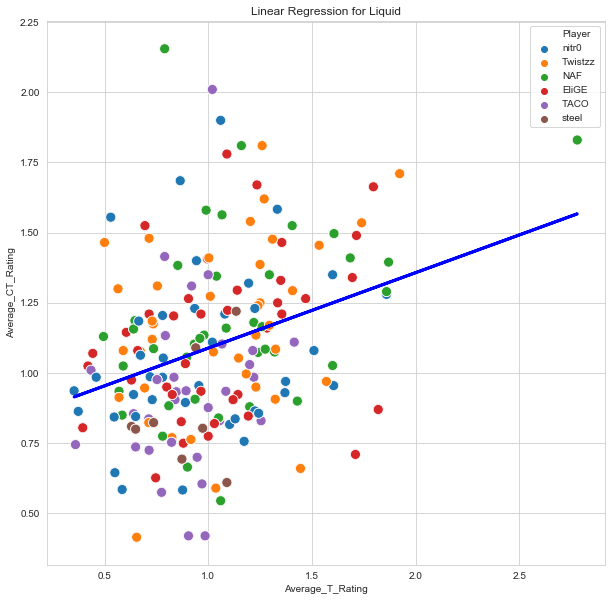

Our coefficient for MIBR is [[-0.02567169]]
Mean squared error: 0.08


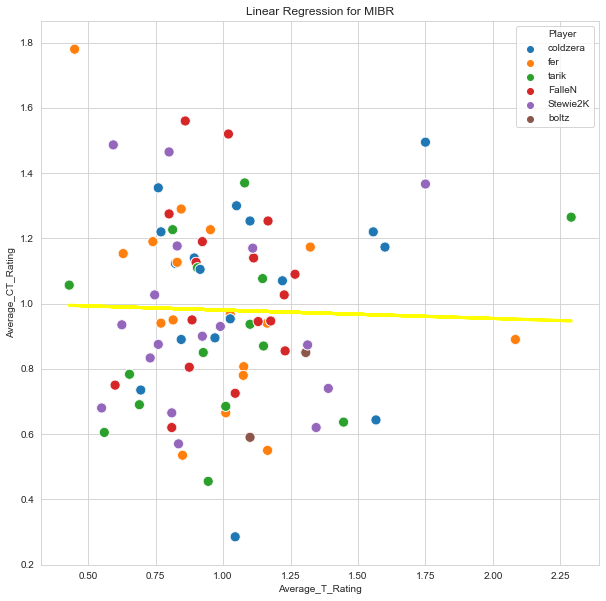

Our coefficient for Natus Vincere is [[0.39103386]]
Mean squared error: 0.09


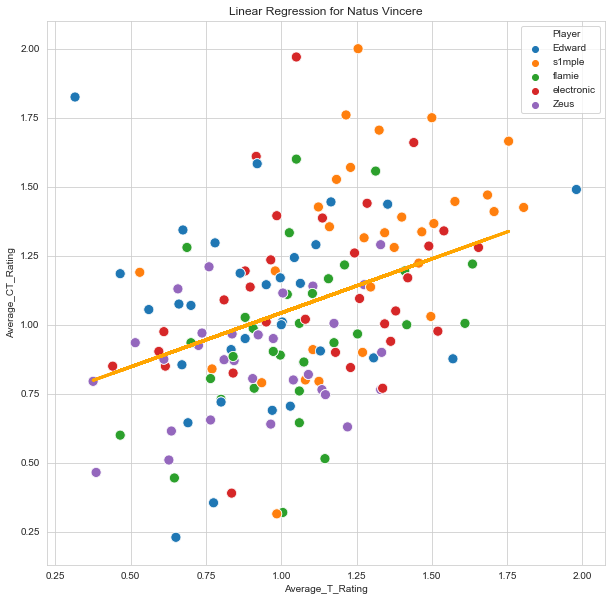

Our coefficient for fnatic is [[0.12239861]]
Mean squared error: 0.05


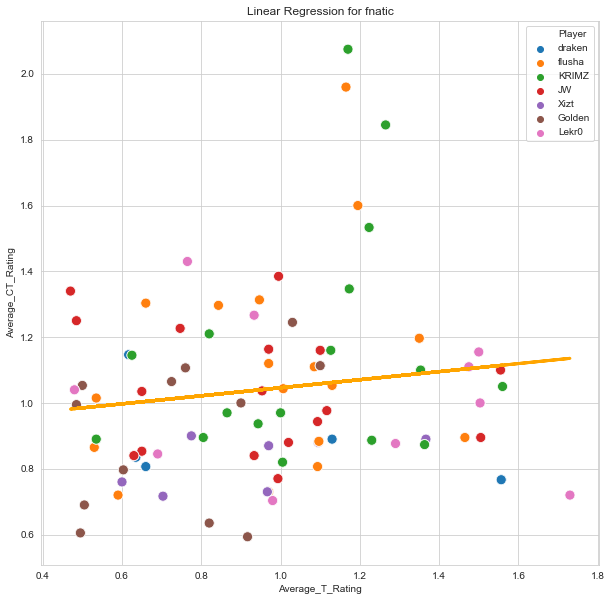

Our coefficient for mousesports is [[0.15421181]]
Mean squared error: 0.10


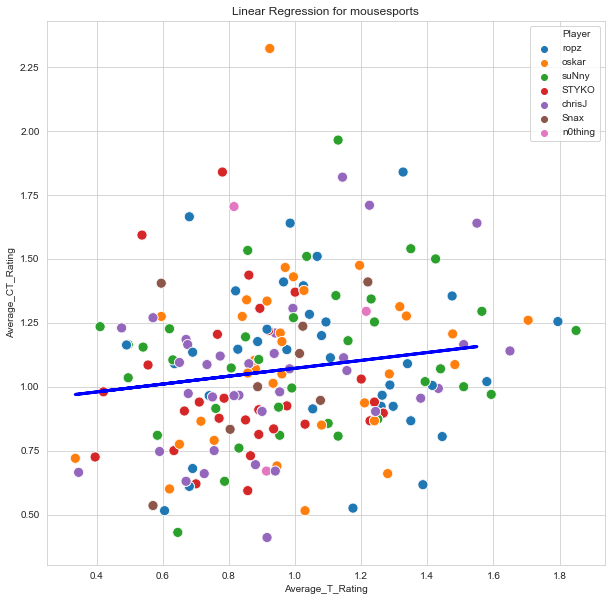

In [20]:
# Creating a linear model by Team. 
for p_type, df in new_df.groupby('Team'):
    # Grab data grouped by Team. 
    sub_X = [[x] for x in df['Average_T_Rating'].values]
    sub_Xvals = [[x] for x in df['Average_CT_Rating'].values]
    # Graphing data. 
    plt.figure(figsize=(10,10,))
    sns.scatterplot(x='Average_T_Rating', y='Average_CT_Rating', s = 100, hue = 'Player', data= new_df.loc[new_df['Team'].isin([p_type])])
    
    # Split up data using a 2/3 training set and a 1/3 test set. 
    x_train, x_test, y_train, y_test = train_test_split(sub_X, sub_Xvals, test_size=0.33, random_state=23)
    sub_lm= LinearRegression().fit(x_train, y_train)
    
    # Creating a linear regression model for each team and plotting it. 
    prediction = sub_lm.predict(x_test)
    print("Our coefficient for", p_type, "is", sub_lm.coef_)
    print("Mean squared error: %.2f" % mean_squared_error(y_test, prediction))
    if(p_type=='Astralis'):
        plt.plot(x_test, prediction, linewidth=3,color = 'green', label = p_type)
    if(p_type=='Cloud9'):
        plt.plot(x_test, prediction, linewidth=3,color = 'orange', label = p_type)
    if(p_type=='SK'):
        plt.plot(x_test, prediction, linewidth=3,color = 'red', label = p_type)
    if(p_type=='FaZe'):
        plt.plot(x_test, prediction, linewidth=3,color = 'magenta', label = p_type)
    if(p_type=='G2'):
        plt.plot(x_test, prediction, linewidth=3,color = 'green', label = p_type)
    if(p_type=='Liquid'):
        plt.plot(x_test, prediction, linewidth=3,color = 'blue', label = p_type)
    if(p_type=='MIBR'):
        plt.plot(x_test, prediction, linewidth=3,color = 'yellow', label = p_type)
    if(p_type=='Natus Vincere'):
        plt.plot(x_test, prediction, linewidth=3,color = 'orange', label = p_type)
    if(p_type=='mousesports'):
        plt.plot(x_test, prediction, linewidth=3,color = 'blue', label = p_type)
    if(p_type=='fnatic'):
        plt.plot(x_test, prediction, linewidth=3,color = 'orange', label = p_type)
    plt.title('Linear Regression for ' + p_type)
    plt.show()

## Conclusion/Final Thoughts
___

We find that when players have stronger T-side rating, they'll also increase their CT-side rating. This could be mean players that have more aggressive playstyles can better translate that success over when they play the defensive side. One thing to consider on our model is if a team is very well balanced, then the data should cluster around the linear regression line. If a team has a superstar carry player this could drastically affect the result; there might not be enough opportunities left for the remaining teammates to have as much impact. Moving forward, more attention should be paid to the specific maps and a players impact per map rather than series. This could reveal the bias of a player to performing well for certain maps versus others.

## Sources

- [Kaggle CS:GO Professional Matches](https://www.kaggle.com/mateusdmachado/csgo-professional-matches)
- [HLTV (original data source)](https://www.hltv.org/)
- [CSGO Learning Subreddit](https://www.reddit.com/r/LearnCSGO/)
- [Pandas Python Library](https://pandas.pydata.org/)
- [Beautiful Soup]([https://www.crummy.com/software/BeautifulSoup/bs4/doc/](https://www.crummy.com/software/BeautifulSoup/bs4/doc/))
- [Matplotlib](https://matplotlib.org/)
- [Numpy](https://numpy.org/)
- [Scikit-Learn](https://scikit-learn.org/stable/)
- [Seaborn](https://seaborn.pydata.org/)
- [CMSC320 Class Webpage](https://www.hcbravo.org/IntroDataSci/)